In [ ]:
"""
Created on Mon Aug 18 17:37 2025

Prepare a domain cfg and a param melt for cavities all closed for my experiments

@author: Clara Burgard
"""

In [2]:
import xarray as xr
from tqdm.notebook import tqdm
import numpy as np
from cdo import Cdo
from datetime import date
from multimelt.constants import *

In [3]:
cdo = Cdo()
print('this is CDO version %s'%(cdo.version()))

this is CDO version 1.9.9rc1


In [14]:
inputpath_raw2 = '/data/cburgard/PREPARE_FORCING/PREPARE_CAVITY_MASKS/raw/'
inputpath_interim = '/data/cburgard/PREPARE_FORCING/PREPARE_CAVITY_MASKS/interim/'
outputpath_newmask = '/data/cburgard/PREPARE_FORCING/PREPARE_CAVITY_MASKS/processed/'
inputpath_interim2='/data/cburgard/PREPARE_FORCING/PREPARE_PRESCRIBED_MELT/interim/'


In [8]:
file_Justine = xr.open_dataset(inputpath_interim + 'Mask_Iceshelf_IMBIE2_v2_with_zmin_zmax_isfconc.nc').drop('quantile')

Prepare the domain cfg for the open and closed cavities that I want to address

In [6]:
domain_cfg = xr.open_dataset(inputpath_raw2 + 'eORCA1.4.3_OpenSeas_OpenAllCav_ModStraights/eORCA1.4.3_OpenSeas_OpenAllCav_ModStraights_domain_cfg.nc')

In [7]:
domain_cfg_new = domain_cfg.copy()
for vvar in ['bottom_level', 'top_level', 'isf_draft', 'bathy_metry', 'mask_opensea', 'mask_csgrpglo']:
    domain_cfg_new[vvar] = domain_cfg_new[vvar].where(domain_cfg['isf_draft'] == 0, 0)

Prepare the injection of meltwater

In [9]:
ds_isfNEMO = xr.open_dataset(inputpath_interim + 'masks_for_eORCA1.nc')
file_Justine = xr.open_dataset(inputpath_interim + 'Mask_Iceshelf_IMBIE2_v2_with_zmin_zmax_isfconc.nc').drop('quantile')

In [15]:
# read in the melt file I had prepared for IPSL-CM
melt_6cavities_openprescribed = xr.open_dataset(inputpath_interim2 + 'eORCA1.4.2_runoff-icb_DaiTrenberth_Davison_open6largestISF.nc', )


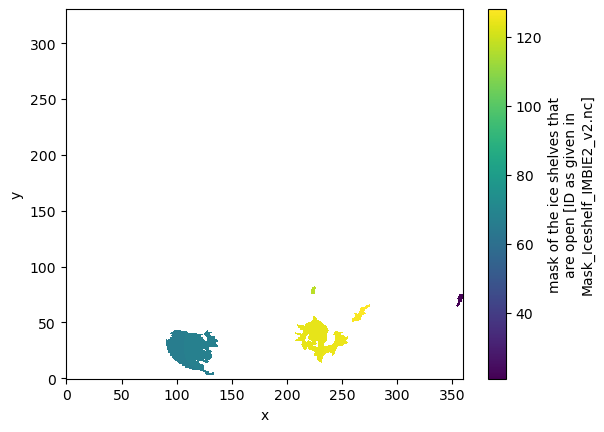

In [22]:
ds_isfNEMO['mask_isf_open'].plot()

In [32]:
melt_6cavities_openinteractive = melt_6cavities_openprescribed.copy()
for vvar in ['sornfisf','sodepmax_isf','sodepmin_isf']:
    melt_6cavities_openinteractive[vvar] = melt_6cavities_openinteractive[vvar].where(np.isnan(ds_isfNEMO['mask_isf_open']), 0)
    

In [39]:
melt_6cavities_openinteractive.squeeze().to_netcdf(outputpath_newmask + 'eORCA1.4.2_runoff-icb_DaiTrenberth_Davison_open6largestISFinteractive.nc', unlimited_dims=['time_counter'])

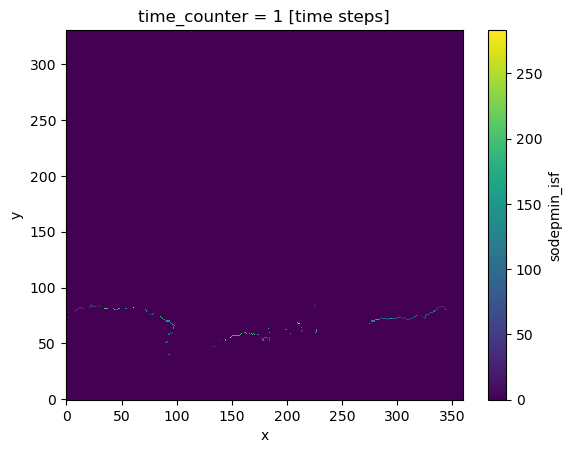

In [34]:
melt_6cavities_openinteractive['sodepmin_isf'].isel(time_counter=0).plot()

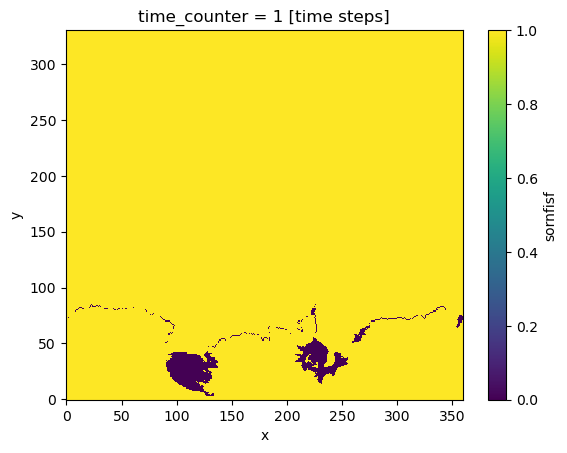

In [26]:
(melt_6cavities_openprescribed['sornfisf'].isel(time_counter=0) == 0).plot()

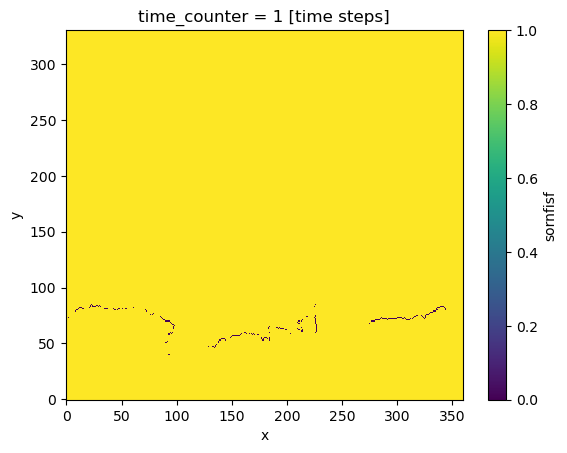

In [28]:
(melt_6cavities_openinteractive['sornfisf'].isel(time_counter=0) == 0).plot()

For the record, this is how the domain_cfg was done:

In [ ]:
new_domain_cfg = domain_cfg.copy()
for vvar in ['bottom_level','top_level','isf_draft','bathy_metry','mask_opensea','mask_csgrpglo']:
    print(vvar)
    new_domain_cfg[vvar] = new_domain_cfg[vvar].where(np.isnan(ds_isfNEMO['mask_isf_closed']), 0)

In [ ]:
new_domain_cfg.to_netcdf(inputpath_interim + 'eORCA1.4.3_OpenSeas_Open6largestISF_ModStraights_domain_cfg.nc')